In [ ]:
#load the dataset
#Import all the
import pandas as pd
!pip install torchmetrics
import torch
import math
import torchmetrics
from google.colab import drive 
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/YelpNYC/reviews_sentiment.csv')
data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,uid,rid,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,13940,134,0.001235,0.000032,0.000144,0.000885,0.008131,0.000084,0.002822,0.000059,...,0.000403,0.000926,0.037832,0.001070,0.000111,0.005251,0.000543,0.000385,0.000620,0.004382
1,8358,79,0.990975,0.000060,0.000062,0.000047,0.003258,0.000040,0.000008,0.000012,...,0.000654,0.000004,0.000385,0.001207,0.000323,0.000115,0.000233,0.000021,0.000011,0.000072
2,135035,797,0.960990,0.000167,0.000017,0.000030,0.010043,0.000494,0.000011,0.000053,...,0.000161,0.000006,0.001690,0.000679,0.001120,0.000315,0.002485,0.000052,0.000021,0.000107
3,98111,482,0.990125,0.000066,0.000038,0.000022,0.002767,0.000066,0.000007,0.000011,...,0.002295,0.000003,0.000292,0.000933,0.000272,0.000063,0.000230,0.000022,0.000010,0.000021
4,102375,514,0.914531,0.000051,0.000150,0.000415,0.032544,0.000152,0.000079,0.000059,...,0.000522,0.000006,0.025739,0.002409,0.000058,0.000814,0.000182,0.000068,0.000053,0.000036


In [ ]:
#Load metadata and use column names
colnames = ['uid', 'rid', 'Rating', 'Fake', 'Date']
metadata = pd.read_csv('/content/gdrive/MyDrive/Data/YelpNYC/metadata.csv',sep = '\t', names = colnames)
metadata.head()

,uid,rid,Rating,Fake,Date
0,923,0,3.0,-1,2014-12-08
1,924,0,3.0,-1,2013-05-16
2,925,0,4.0,-1,2013-07-01
3,926,0,4.0,-1,2011-07-28
4,927,0,4.0,-1,2010-11-01


In [ ]:
metadata.Fake.value_counts()

 1    322167
-1     36885
Name: Fake, dtype: int64

In [ ]:
#Merge emotions data and metadata to obtain label for fake
df = data.merge(metadata, how = 'inner', on= ["uid", "rid"])
df

,uid,rid,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,optimism,pride,realization,relief,remorse,sadness,surprise,Rating,Fake,Date
0,13940,134,0.001235,0.000032,0.000144,0.000885,0.008131,0.000084,0.002822,0.000059,...,0.001070,0.000111,0.005251,0.000543,0.000385,0.000620,0.004382,3.0,1,2007-01-18
1,13940,134,0.819013,0.000165,0.000443,0.000428,0.023001,0.000180,0.000383,0.000325,...,0.002053,0.000078,0.000333,0.000187,0.000258,0.000127,0.000063,3.0,1,2007-01-18
2,13940,134,0.850977,0.000139,0.000073,0.000230,0.100195,0.000365,0.000041,0.000047,...,0.003947,0.000038,0.000847,0.000406,0.000036,0.000036,0.000069,3.0,1,2007-01-18
3,13940,134,0.805577,0.000948,0.000499,0.000578,0.079065,0.000168,0.000116,0.000196,...,0.000844,0.000839,0.001003,0.001640,0.000048,0.000074,0.001070,3.0,1,2007-01-18
4,13940,134,0.006406,0.000498,0.038046,0.898069,0.002970,0.000100,0.000138,0.000029,...,0.000447,0.004383,0.004148,0.000313,0.000083,0.000192,0.000498,3.0,1,2007-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,139275,759,0.454846,0.000448,0.000250,0.000792,0.067548,0.000185,0.000341,0.000320,...,0.005244,0.000110,0.001676,0.000404,0.000140,0.000136,0.000833,5.0,-1,2013-03-04
28996,139275,759,0.001155,0.000570,0.001440,0.004838,0.169290,0.004743,0.000511,0.002253,...,0.007376,0.000241,0.003507,0.002533,0.000605,0.003737,0.000382,5.0,-1,2013-03-04
28997,139275,759,0.579947,0.005496,0.000152,0.000175,0.014848,0.000190,0.000103,0.000491,...,0.000592,0.000615,0.000690,0.000611,0.000037,0.000044,0.008841,5.0,-1,2013-03-04
28998,139275,759,0.986837,0.000030,0.000030,0.000043,0.004496,0.000137,0.000011,0.000035,...,0.001248,0.000035,0.000048,0.000132,0.000031,0.000013,0.000013,5.0,-1,2013-03-04


In [ ]:
#Check correlations between emotions
df.corr()

,uid,rid,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,neutral,optimism,pride,realization,relief,remorse,sadness,surprise,Rating,Fake
uid,1.000000,0.365906,-0.005469,-0.001887,0.002801,0.005885,0.004579,0.000067,0.003184,0.002269,...,-0.001750,-0.002865,0.007051,0.007135,0.003580,0.006784,0.013412,0.005273,0.065476,-0.207785
rid,0.365906,1.000000,0.001020,-0.000442,-0.011724,-0.004997,-0.000580,0.007462,0.004720,-0.000775,...,0.003822,0.003472,0.006194,0.003272,0.001463,-0.003136,0.017531,0.003083,-0.026621,-0.041614
admiration,-0.005469,0.001020,1.000000,-0.102280,-0.107184,-0.173703,-0.474048,-0.092921,-0.097633,-0.097831,...,-0.296353,-0.104268,-0.038691,-0.178945,-0.116883,-0.070225,-0.082327,-0.154610,-0.003264,-0.004348
amusement,-0.001887,-0.000442,-0.102280,1.000000,-0.001537,0.017979,-0.016709,-0.002370,-0.001276,-0.002230,...,0.000590,0.001769,0.017215,-0.000060,-0.004979,-0.002354,-0.001857,-0.002465,-0.004331,-0.001063
anger,0.002801,-0.011724,-0.107184,-0.001537,1.000000,0.209472,-0.030328,0.008149,-0.002587,0.000492,...,0.002521,-0.005125,0.067824,-0.003894,-0.004913,0.006954,0.018898,-0.006548,0.011966,0.006321
annoyance,0.005885,-0.004997,-0.173703,0.017979,0.209472,1.000000,-0.031397,0.010640,0.004150,0.002184,...,0.007503,-0.002098,0.049037,0.022809,0.000570,0.006712,0.010027,-0.008514,0.001480,-0.005318
approval,0.004579,-0.000580,-0.474048,-0.016709,-0.030328,-0.031397,1.000000,0.018516,-0.017715,-0.005967,...,0.078143,0.050102,-0.011837,0.007707,0.105552,-0.003414,-0.016793,-0.037829,0.004760,-0.003803
caring,0.000067,0.007462,-0.092921,-0.002370,0.008149,0.010640,0.018516,1.000000,-0.001864,0.013329,...,0.046920,0.043172,-0.004890,-0.002137,0.094431,0.034730,0.032534,-0.006671,0.000425,-0.001367
confusion,0.003184,0.004720,-0.097633,-0.001276,-0.002587,0.004150,-0.017715,-0.001864,1.000000,0.088849,...,0.010127,-0.001165,-0.003654,0.011261,0.000487,0.004016,0.000153,0.007793,-0.005337,0.003889
curiosity,0.002269,-0.000775,-0.097831,-0.002230,0.000492,0.002184,-0.005967,0.013329,0.088849,1.000000,...,0.022708,-0.001028,-0.004922,-0.002460,0.007699,0.019358,0.007544,0.007595,0.001173,-0.003028


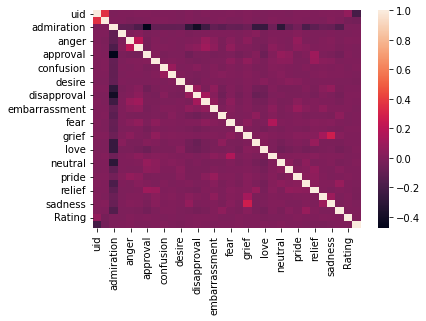

In [ ]:
#Heatmap of correlation
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
#Change RID to category
df["Fake"][df["Fake"] == -1] = 0

<ipython-input-262-78ff7e6905f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fake"][df["Fake"] == -1] = 0


### Simple Logistic without RID and no balance

In [ ]:
#x = df[["admiration", "amusement", "anger", "annoyance", "approval", "caring", 'curiosity', 'desire',
       #'disappointment', 'disapproval', 'disgust', 'embarrassment',
       #'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       #'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       #'sadness', 'surprise', 'neutral', 'rid']]

x = df[["admiration", "amusement", "anger", "annoyance", "approval", "caring", 'curiosity', 'desire',
       'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral']]
y = df["Fake"]

x = x.values
y = y.values

In [ ]:
#df_dummy = pd.get_dummies(x, columns= ['rid'])

In [ ]:
#x = df_dummy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=69)

In [ ]:
from sklearn.linear_model import LogisticRegression

simple_lm = LogisticRegression()
simple_lm.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = simple_lm.predict(X_test)

NameError: ignored

In [ ]:
import numpy as np
np.unique(y_pred, return_counts=True)

(array([1]), array([8700]))

### Logistic by balance 0.5 fake and 0.5 true

In [ ]:
import numpy as np
np.random.seed(42)
indexes = list(range(len(df)))
train_idx = random.sample(indexes, int(0.85*len(df)))
#val_idx = np.random.choice(range(len(test_val_idx)), int(0.30*len(test_val_idx)), replace=False)
test_idx = [i for i in indexes if i not in set(train_idx)]


In [ ]:
len(train_idx)+len(test_idx) == len(df)

True

In [ ]:
real = []
fake = []
for i in train_idx:
  if y[i] == 1:
    real.append(i)
  else:
    fake.append(i)

In [ ]:
import random
train_fake_idx = fake
train_real_idx = random.sample(real, len(fake))

In [ ]:
train_idx = train_fake_idx + train_real_idx
test_idx = [i for i in range(len(df)) if i not in set(train_idx)]

In [ ]:
X_train = x[train_idx]
X_test = x[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

In [ ]:
##Train_Logistic
from sklearn.linear_model import LogisticRegression

balance_lm = LogisticRegression()
balance_lm.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = balance_lm.predict(X_test)
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([17821,  6087]))

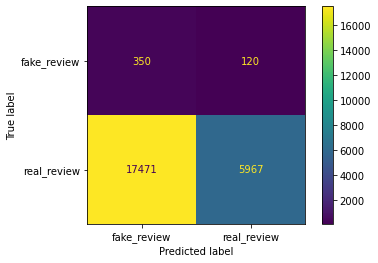

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake_review','real_review'])
cmd.plot()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.02      0.74      0.04       470
        Real       0.98      0.25      0.40     23438

    accuracy                           0.26     23908
   macro avg       0.50      0.50      0.22     23908
weighted avg       0.96      0.26      0.40     23908



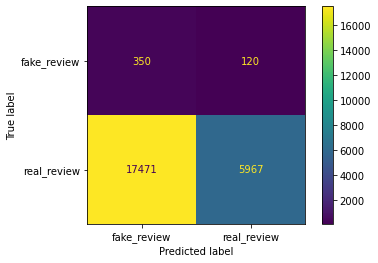

In [ ]:
#Giving it balamnced test data

real = []
fake = []
for i in train_idx:
  if y[i] == 1:
    real.append(i)
  else:
    fake.append(i)


import random
train_fake_idx = fake
train_real_idx = random.sample(real, len(fake))


train_idx = train_fake_idx + train_real_idx
test_idx = [i for i in range(len(df)) if i not in set(train_idx)]


X_train = x[train_idx]
X_test = x[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]



balance_lm = LogisticRegression()
balance_lm.fit(X_train, y_train)

y_pred = balance_lm.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake_review','real_review'])
cmd.plot()

In [ ]:
target_names = ['Fake', 'Real']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.02      0.74      0.04       470
        Real       0.98      0.25      0.40     23438

    accuracy                           0.26     23908
   macro avg       0.50      0.50      0.22     23908
weighted avg       0.96      0.26      0.40     23908



## Adding restaurant ID

In [ ]:
df['rid'] = df['rid'].astype('category')

x = df[["admiration", "amusement", "anger", "annoyance", "approval", "caring", 'curiosity', 'desire',
       'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral', 'rid']]

y = df["Fake"]


df_dummy = pd.get_dummies(x, columns= ['rid'])


In [ ]:
xcols = df_dummy.columns.values.tolist()

In [ ]:
x = df_dummy[xcols]
x = x.values
y = y.values

In [ ]:
x

array([[1.23529043e-03, 3.18888488e-05, 1.43992293e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.19012821e-01, 1.65191144e-04, 4.42596676e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.50977123e-01, 1.39053169e-04, 7.34733403e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.79946935e-01, 5.49636967e-03, 1.52014123e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.86837268e-01, 2.99934236e-05, 3.01505552e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.84879553e-01, 1.51454529e-04, 8.85551126e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:

real = []
fake = []
for i in train_idx:
  if y[i] == 1:
    real.append(i)
  else:
    fake.append(i)



In [ ]:

import random
train_fake_idx = fake
train_real_idx = random.sample(real, len(fake))



In [ ]:

train_idx = train_fake_idx + train_real_idx
test_idx = [i for i in range(len(df)) if i not in set(train_idx)]



In [ ]:
x

array([[1.23529043e-03, 3.18888488e-05, 1.43992293e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.19012821e-01, 1.65191144e-04, 4.42596676e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.50977123e-01, 1.39053169e-04, 7.34733403e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.79946935e-01, 5.49636967e-03, 1.52014123e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.86837268e-01, 2.99934236e-05, 3.01505552e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.84879553e-01, 1.51454529e-04, 8.85551126e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
len(train_idx)+len(test_idx) == len(df)

True

In [ ]:
X_train = x[train_idx]
X_test = x[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]





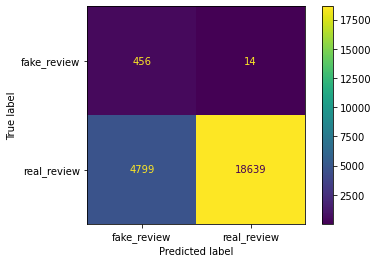

In [ ]:
balance_lm = LogisticRegression()
balance_lm.fit(X_train, y_train)

y_pred = balance_lm.predict(X_test)
y_true = y_test
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['fake_review','real_review'])
cmd.plot()

In [ ]:
target_names = ['Fake', 'Real']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.09      0.97      0.16       470
        Real       1.00      0.80      0.89     23438

    accuracy                           0.80     23908
   macro avg       0.54      0.88      0.52     23908
weighted avg       0.98      0.80      0.87     23908



In [ ]:
balance_lm.coef_